## Observations and Insights 

In [169]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
metadata = pd.read_csv(mouse_metadata_path)
results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
core0 = pd.merge(metadata, results, on="Mouse ID", how="left")
core0

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [170]:
# Checking the number of mice in the DataFrame.
mice = core0["Mouse ID"].nunique()
mice

249

In [171]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = results["Mouse ID"].value_counts()
duplicate

g989    13
t724    10
j119    10
a411    10
n364    10
        ..
d133     1
n482     1
b447     1
v199     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [172]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = results.loc[results["Mouse ID"]=="g989",:]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [173]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata1 = metadata.loc[metadata["Mouse ID"] != "g989", :]
results1 = results.loc[results["Mouse ID"] != "g989", :]
core1 = pd.merge(metadata1, results1, on="Mouse ID", how="left")
core1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [174]:
# Checking the number of mice in the clean DataFrame.
core1["Mouse ID"].nunique()

248

## Summary Statistics

In [175]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
error = core1.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stdv, "Standard Error of the Mean": error})
#Formatting
statistics["Mean"] = statistics["Mean"].map("{:,.2f}".format)
statistics["Median"] = statistics["Median"].map("{:,.2f}".format)
statistics["Variance"] = statistics["Variance"].map("{:,.2f}".format)
statistics["Standard Deviation"] = statistics["Standard Deviation"].map("{:,.2f}".format)
statistics["Standard Error of the Mean"] = statistics["Standard Error of the Mean"].map("{:,.2f}".format)
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

<IPython.core.display.Javascript object>


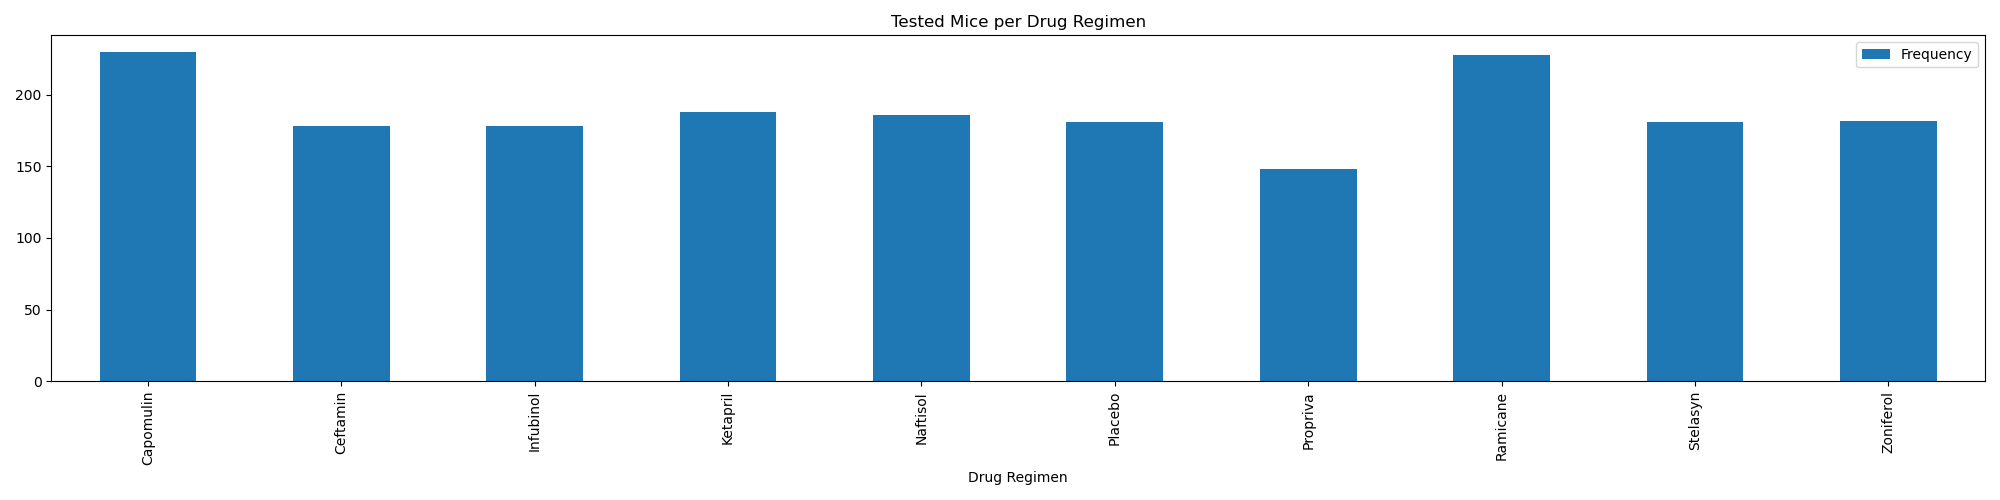

In [177]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar0 = pd.DataFrame(core1.groupby(["Drug Regimen"]).count()).reset_index()
plot0 = bar0[["Drug Regimen","Mouse ID"]]
plot0 = plot0.rename(columns={"Mouse ID":"Frequency"})
plot0 = plot0.set_index("Drug Regimen")
plot0.plot(kind="bar",figsize=(20,5))
plt.title("Tested Mice per Drug Regimen")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


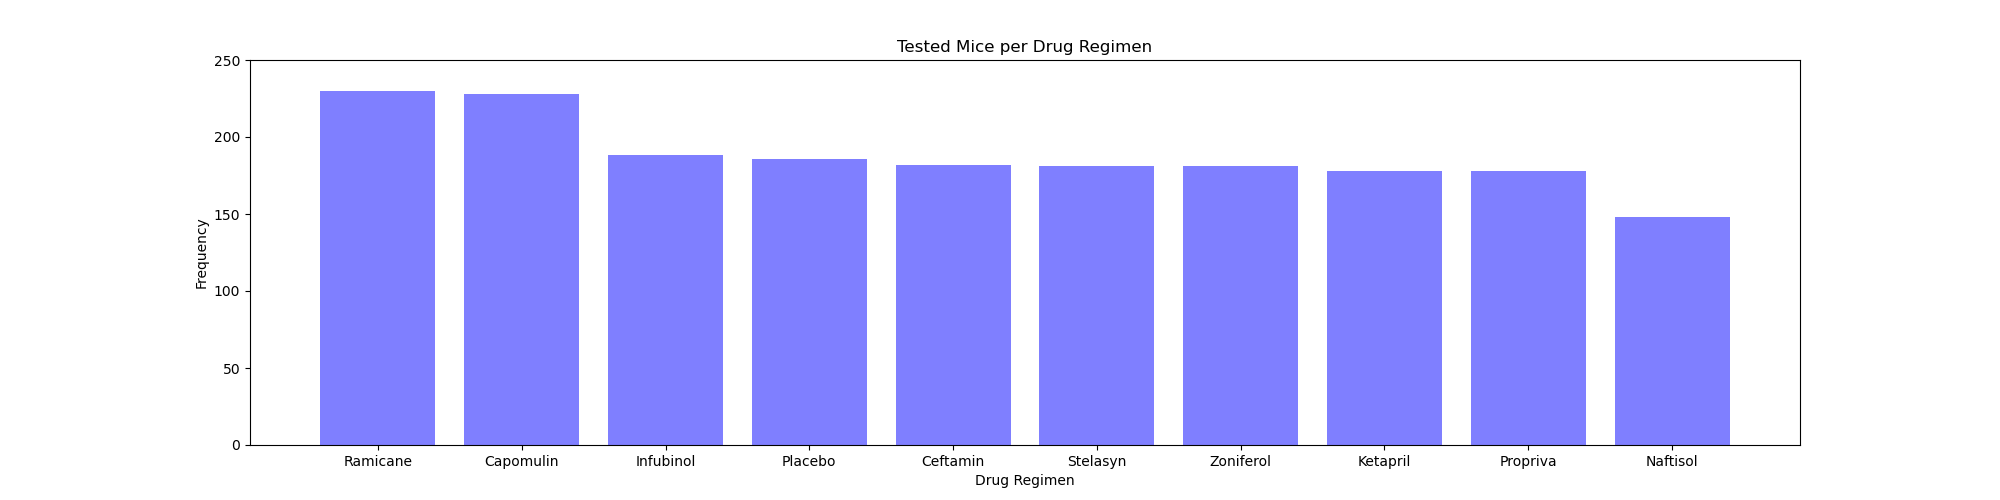

In [178]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drugs0 = core1["Drug Regimen"].unique()
drugs1 = drugs0.tolist()
frequency = core1["Drug Regimen"].value_counts()
plt.figure(figsize=(20,5))
plt.bar(drugs1,frequency,color="b",alpha=0.5,align="center")
plt.title("Tested Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Frequency")
plt.ylim(0,max(frequency)+20)
plt.show()

## Pie Plots

<IPython.core.display.Javascript object>


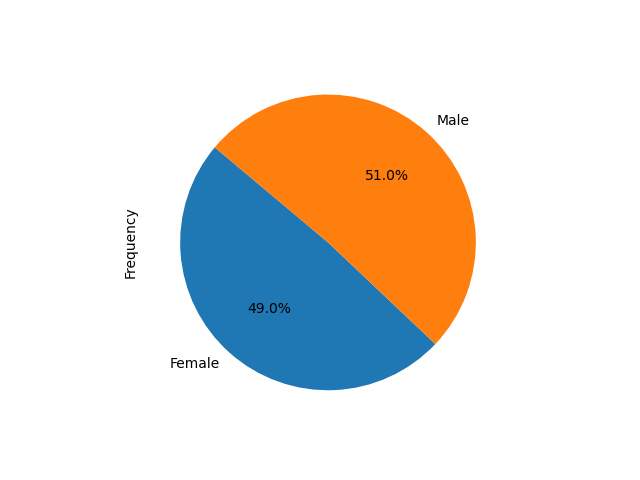

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders0 = pd.DataFrame(core1.groupby(["Sex"]).count()).reset_index()
genders0 = genders0[["Sex","Mouse ID"]]
genders0 = genders0.rename(columns={"Mouse ID":"Frequency"})
genders0.set_index("Sex")
genders0.plot(kind="pie", y="Frequency", autopct = "%1.1f%%", startangle = 140, shadow = False,
              labels = genders0["Sex"], legend = False, fontsize = 10)


<IPython.core.display.Javascript object>


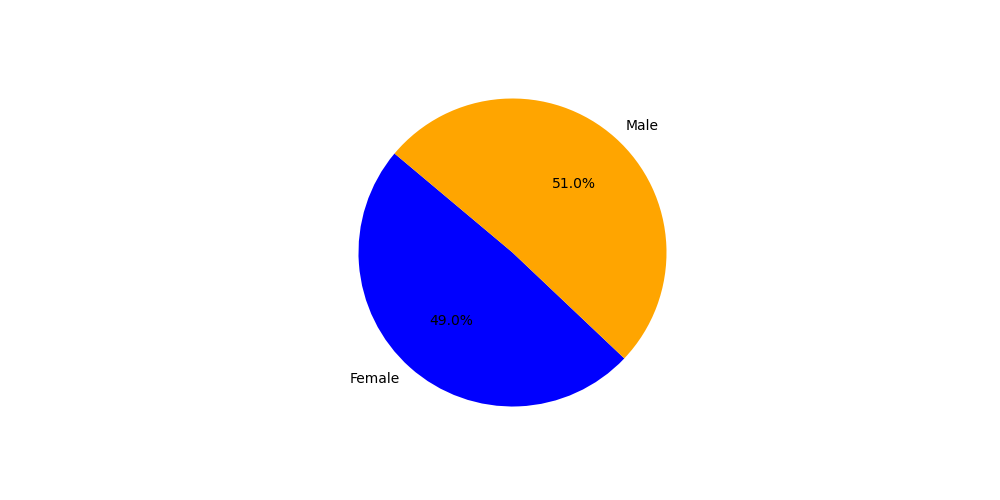

([<matplotlib.patches.Wedge at 0x1c7e02c12e0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116862, 0.8210030133321533, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.39932117891546515, 0.4478198254539018, '51.0%')])

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
males = genders0["Frequency"].values[0]
females = genders0["Frequency"].values[1]
genderlist = [males,females]
plt.figure(figsize=(10,5))
plt.pie(genderlist, explode=(0.0,0), labels = labels, colors = ["blue","orange"],autopct="%1.1f%%", shadow=False,startangle = 140)


## Quartiles, Outliers and Boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
statistics.sort_values(by=['Mean'], inplace=True)
statistics.reset_index()
promising0 = statistics["Mean"]
promising0 = promising0.reset_index().head(4)
promising0

,Drug Regimen,Mean
0,Ramicane,40.22
1,Capomulin,40.68
2,Propriva,52.32
3,Ceftamin,52.59


In [182]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
promisinglist = ["Ramicane", "Capomulin", "Propriva", "Ceftamin"]
promising1 = core1[core1["Drug Regimen"].isin(["Ramicane", "Capomulin", "Propriva", "Ceftamin"])]
promising1 = promising1.sort_values(["Timepoint"], ascending=False)
promising2 = promising1[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
promising2

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
410,Ramicane,u196,40.667713,45
493,Ceftamin,a275,62.999356,45
59,Ramicane,s508,30.276232,45
337,Capomulin,j119,38.125164,45
430,Ramicane,a444,43.047543,45
...,...,...,...,...
338,Capomulin,w150,45.000000,0
1636,Propriva,v991,45.000000,0
341,Capomulin,v923,45.000000,0
1265,Propriva,o523,45.000000,0


In [183]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

<IPython.core.display.Javascript object>


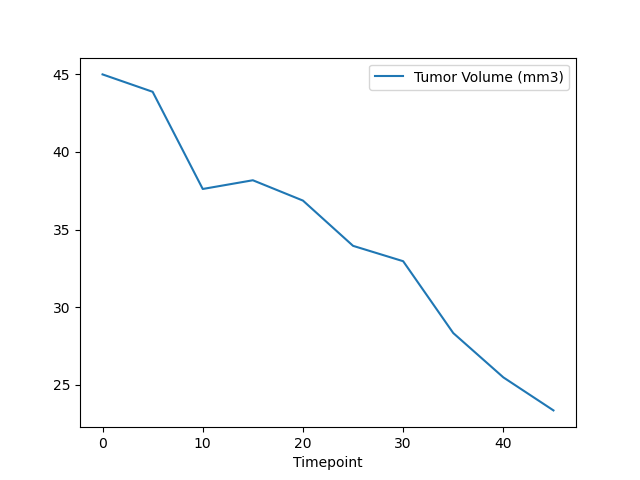

In [184]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line = core1[core1["Mouse ID"].isin(["s185"])]
linechart0 = line[["Mouse ID","Timepoint","Tumor Volume (mm3)"]].set_index("Timepoint")
linechart1 = linechart0.plot.line()

<IPython.core.display.Javascript object>


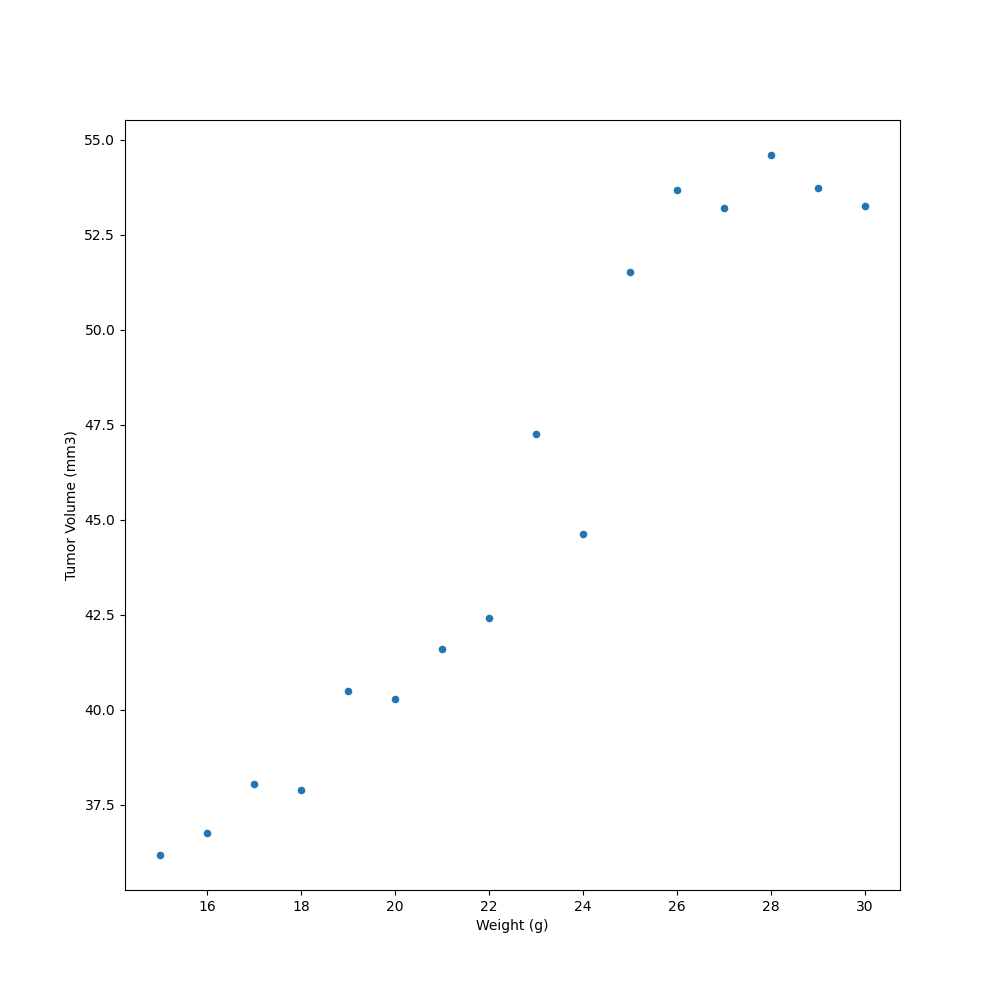

In [185]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter = core1[core1["Drug Regimen"].isin(["Capomulin"])]
scatterplot0 = core1[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatterplot1 = scatterplot0.sort_values(["Weight (g)"], ascending = True)
scatterplot2 = scatterplot1.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
scatterplot2 = scatterplot2.reset_index()
scatterplot3 = scatterplot2.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)", 
                                 figsize = (10,10))

## Correlation and Regression

In [186]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin0 = core1.loc[core1["Drug Regimen"]=="Capomulin"]
capomulin1 = core1[core1["Drug Regimen"].isin(["Capomulin"])]
weights = capomulin1.iloc[:,4]
mm3 = capomulin1.iloc[:,6]
r = st.pearsonr(weights,mm3)
r

(0.5256995552077172, 9.605446629501734e-18)

<IPython.core.display.Javascript object>


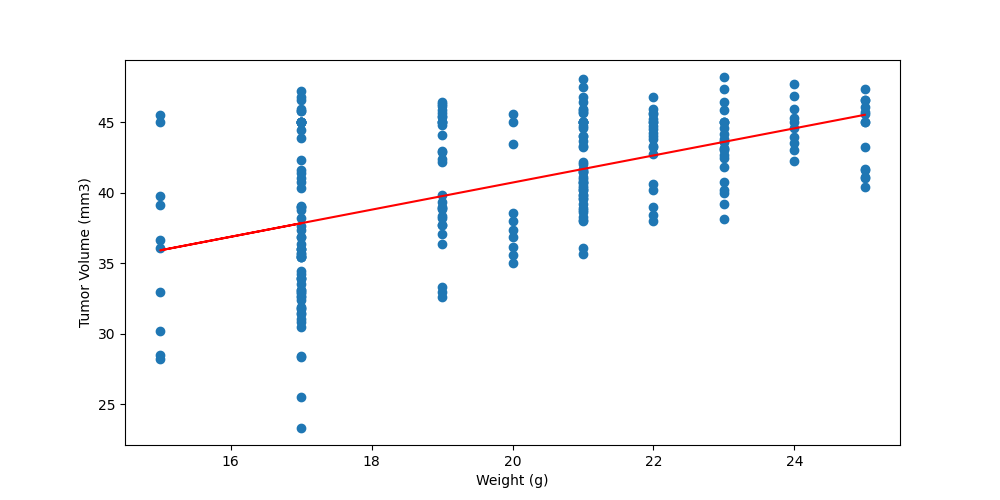

In [187]:
x = capomulin1["Weight (g)"]
y = capomulin1["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x*slope + intercept
equation = "y = " + str(slope) + str(intercept)
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [188]:
print("The least effective drugs were Ketapril and Naftisol as the yielded the highest tumor size at the last timestamp")

The least effective drugs were Ketapril and Naftisol as the yielded the highest tumor size at the last timestamp


In [189]:
print("The best performing drug is Capomulin where we witness a decrease in tumor sizes of 33 percent on average as the treatment goes on in addition to the least number of metastatic sites")

The best performing drug is Capomulin where we witness a decrease in tumor sizes as the treatment goes on in addition to the least number of metastatic sites


In [193]:
print("Ramicane was also an effective drug, coming in second place with an average decrease of the tumor size of approximately 26 percent by the end of the treatment.")

Ramicane was also an effective drug, coming in second place with an average decrease of the tumor size of approximately 26 percent by the end of the treatment.
